In [87]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit import RDLogger
import pandas as pd
from rdkit.Chem import rdMolDescriptors as rdescriptors
from rdkit.Chem import Descriptors
import rdkit.Chem.Lipinski as lp
import seaborn as sn
import matplotlib.pyplot as plt

In [34]:
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

In [48]:
drugbank = [mol for mol in Chem.SDMolSupplier("../../data/drugbank.sdf") if not mol == None]

data = pd.read_csv("../../data/chembl_mtor_ic50.csv",sep=";")
mtor = list(Chem.MolFromSmiles(smiles) for smiles in data["Smiles"])

In [ ]:
drugbank_mw = [rdescriptors.CalcExactMolWt(mol) for mol in drugbank]
mtor_mw = [rdescriptors.CalcExactMolWt(mol) for mol in mtor]

<Axes: >

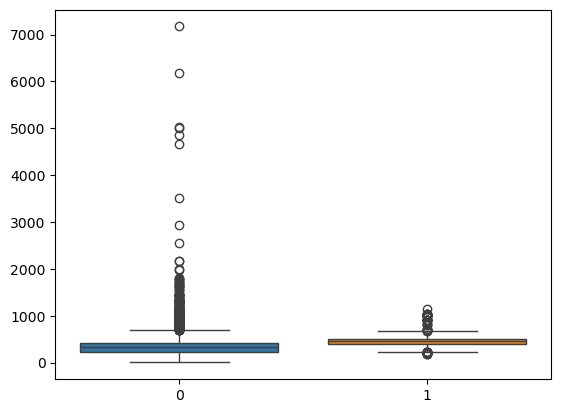

In [59]:
sn.boxplot([drugbank_mw,mtor_mw])

In [ ]:
drugbank_HBA = [lp.NumHAcceptors(mol) for mol in drugbank]
mtor_HBA = [lp.NumHAcceptors(mol) for mol in mtor]

drugbank_HBD = [lp.NumHDonors(mol) for mol in drugbank]
mtor_HBD = [lp.NumHDonors(mol) for mol in mtor]

drugbank_logp = [Chem.Descriptors.MolLogP(mol) for mol in drugbank]
mtor_logp = [Chem.Descriptors.MolLogP(mol) for mol in mtor]

/tmp/ipykernel_62720/3219667084.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set(xticklabels=["D HBA","M HBA","D HBD", "M HBD","D logP", "M logP"])


[[Text(0, 0, 'D HBA'),
  Text(1, 0, 'M HBA'),
  Text(2, 0, 'D HBD'),
  Text(3, 0, 'M HBD'),
  Text(4, 0, 'D logP'),
  Text(5, 0, 'M logP')]]

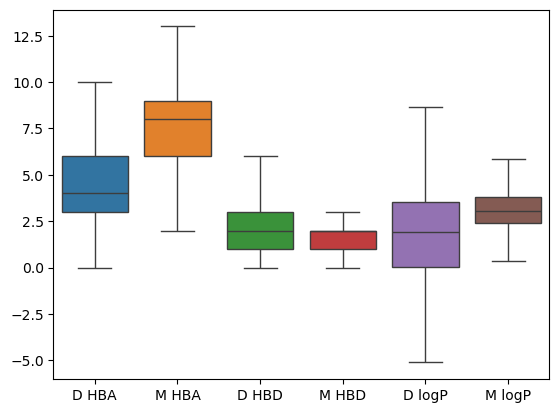

In [80]:
plot = sn.boxplot([drugbank_HBA,mtor_HBA,drugbank_HBD,mtor_HBD,drugbank_logp,mtor_logp],showfliers=False)
plot.set(xticklabels=["D HBA","M HBA","D HBD", "M HBD","D logP", "M logP"])

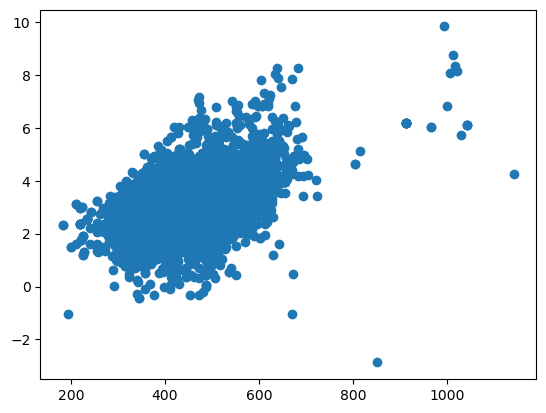